In [1]:
import os
import glob
from plotdata import *

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from cmocean import cm
import pandas as pd
from utils import *

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.mpl.ticker as cticker
from cartopy.io.shapereader import Reader, natural_earth
import matplotlib.ticker as mticker
import contextily as ctx
import cmaps
import salem

## Temperatura

In [2]:
# Open datasets
tx90p = xr.open_dataset('Trends/Temp/tx90p_AMZ.nc')
tn90p = xr.open_dataset('Trends/Temp/tn90p_AMZ.nc')
tx10p = xr.open_dataset('Trends/Temp/tx10p_AMZ.nc')
tn10p = xr.open_dataset('Trends/Temp/tn10p_AMZ.nc')

In [3]:
# Concatenate datasets
ds = xr.concat([tx90p, tn90p, tx10p, tn10p], dim='Index')

In [4]:
# Open shapefile
path_shape_ipcc = f'{os.path.expanduser("~")}/OneDrive/Documentos/Shapefiles/IPCC_Regions_SA/'
AMZ_shp = f'{os.path.expanduser("~")}/OneDrive/Documentos/Shapefiles/amapoly_ivb/'
shape_AMZ_IPCC = salem.read_shapefile('Shape_AMZ_IPCC/IPCC_Regions_SA_AMZ.shp')
shape_IPCC = salem.read_shapefile(f'{path_shape_ipcc}IPCC_Regions_SA.shp')
shape_AMZ = salem.read_shapefile(f'{AMZ_shp}amapoly_ivb.shp')

In [5]:
cmap_temp_ncl = cmaps.ncl_default

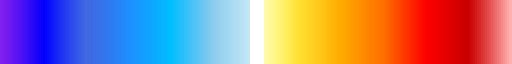

In [6]:
# Insert white color in cmap
cmap_temp_ncl = cmap_temp_ncl(np.arange(cmap_temp_ncl.N))
locs = [124, 125, 126, 127, 128, 129, 130]
for n in locs:
    cmap_temp_ncl[n] = np.array([1, 1, 1, 1]) # White -> 125, 126, 127, 128, 129
cmap_temp_ncl = mpl.colors.ListedColormap(cmap_temp_ncl)
cmap_temp_ncl

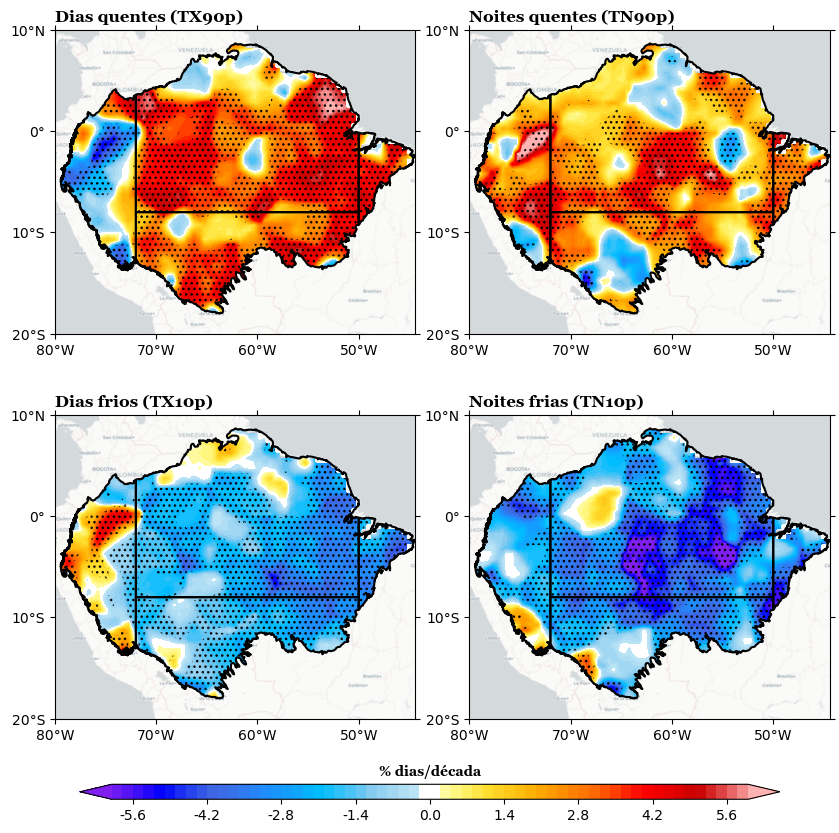

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), 
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        gridspec_kw={'hspace': 0.0, 'wspace': 0.15})
axs = axs.flatten()

titulos = ['Dias quentes (TX90p)', 'Noites quentes (TN90p)', 'Dias frios (TX10p)', 'Noites frias (TN10p)']
levels = np.arange(-6, 6.2, 0.2)

# Plot maps
for i, ax in enumerate(axs):
    cs = (ds.Trend.isel(Index=i) * 10).plot.contourf(ax=ax, cmap=cmap_temp_ncl, robust=True, levels=levels,
                                transform=ccrs.PlateCarree(), add_colorbar=False, add_labels=False, extend='both')
    
    # Plot significance
    ds.Sig.isel(Index=i).where(ds.Sig.isel(Index=i) < 0.05).plot.contourf(ax=ax,
                                hatches=['...'], alpha=0, add_colorbar=False, add_labels=False)

    # # Colorbar
    # cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', pad=0.13, shrink=0.8)
    # # Add title in cbar
    # cbar.ax.set_title('% of days/decade', fontsize=10, fontweight='bold', fontname='Georgia')

    # # Remove minor ticks of cbar
    # cbar.minorticks_off()

    # # Format cbar ticks to :.1f
    # cbar.ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
    
    # Plot shapefiles
    shape_AMZ_IPCC.plot(ax=ax, edgecolor='k', linewidth=1.5, facecolor='none')

    # Plot basemap ctx
    ctx.add_basemap(ax, crs=ccrs.PlateCarree(), source=ctx.providers.CartoDB.Positron,
                     attribution=False)
    
    # Add ticks
    ax.set_xticks([-80, -70, -60, -50], crs=ccrs.PlateCarree())
    ax.set_yticks([-20, -10, 0, 10], crs=ccrs.PlateCarree())
    # Add ticks labels
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())

    # Set title
    ax.set_title(titulos[i], fontsize=12, fontweight='bold', loc='left', fontname='Georgia')

    # Ticks
    ax.tick_params(axis='both', which='major', top=True, right=True)


# Add colorbar horizontal
cbar_ax = fig.add_axes([0.15, 0.07, 0.7, 0.015]) # [left, bottom, width, height]
# Colorbar
cbar = plt.colorbar(cs, cax=cbar_ax, orientation='horizontal')
# Add title in cbar
cbar.ax.set_title('% dias/década', fontsize=10, fontweight='bold', fontname='Georgia')
# Remove minor ticks of cbar
cbar.minorticks_off()
# Format cbar ticks to :.1f
cbar.ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

# Save figure
fig.savefig(f'Trends_maps_Temp_VI.png', dpi=600, bbox_inches='tight', facecolor='w')

## Precipitação

In [11]:
cdd = xr.open_dataset('Trends/Precip/cdd_AMZ.nc')
cwd = xr.open_dataset('Trends/Precip/cwd_AMZ.nc')
sdii = xr.open_dataset('Trends/Precip/sdii_AMZ.nc')
rx1day = xr.open_dataset('Trends/Precip/rx1day_AMZ.nc')

In [12]:
# Concatenate datasets
ds = xr.concat([cdd, cwd, sdii, rx1day], dim='Index')

In [14]:
cmap_prec_ncl = cmaps.MPL_BrBG

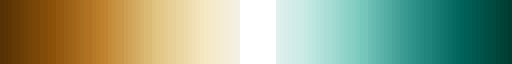

In [20]:
# Insert white color in cmap
cmap_prec_ncl = cmap_prec_ncl(np.arange(cmap_prec_ncl.N))
locs = [60, 61, 62, 63, 64, 65, 66, 67, 68]
for n in locs:
    cmap_prec_ncl[n] = np.array([1, 1, 1, 1]) # White -> 125, 126, 127, 128, 129
cmap_prec_ncl = mpl.colors.ListedColormap(cmap_prec_ncl)
cmap_prec_ncl

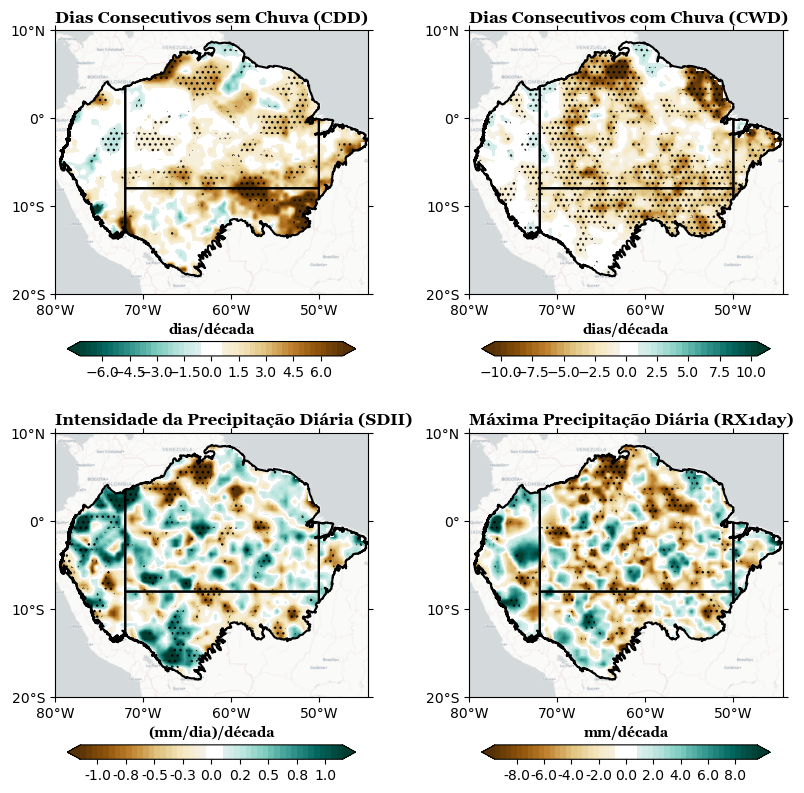

In [35]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), 
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        gridspec_kw={'hspace': 0.1, 'wspace': 0.15})
axs = axs.flatten()

titulos = ['Dias Consecutivos sem Chuva (CDD)', 'Dias Consecutivos com Chuva (CWD)', 
           'Intensidade da Precipitação Diária (SDII)', 'Máxima Precipitação Diária (RX1day)']
levels = 50

# Plot maps
for i, ax in enumerate(axs):
    if i == 0:
        cs = (ds.Trend.isel(Index=i) * 10).plot.contourf(ax=ax, cmap=cmap_prec_ncl.reversed(), robust=True, levels=levels,
                                    transform=ccrs.PlateCarree(), add_colorbar=False, add_labels=False, extend='both')
        # Colorbar
        cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', pad=0.13, shrink=0.8)
        # Add title in cbar
        cbar.ax.set_title('dias/década', fontsize=10, fontweight='bold', fontname='Georgia')
        # Remove minor ticks of cbar
        cbar.minorticks_off()

    elif i == 1:
        cs = (ds.Trend.isel(Index=i) * 10).plot.contourf(ax=ax, cmap=cmap_prec_ncl, robust=True, levels=levels,
                                    transform=ccrs.PlateCarree(), add_colorbar=False, add_labels=False, extend='both')
        # Colorbar
        cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', pad=0.13, shrink=0.8)
        # Add title in cbar
        cbar.ax.set_title('dias/década', fontsize=10, fontweight='bold', fontname='Georgia')
        # Remove minor ticks of cbar
        cbar.minorticks_off()

    else:
        cs = (ds.Trend.isel(Index=i) * 10).plot.contourf(ax=ax, cmap=cmap_prec_ncl, robust=True, levels=levels,
                                    transform=ccrs.PlateCarree(), add_colorbar=False, add_labels=False, extend='both')

        if i == 2:
            # Colorbar
            cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', pad=0.13, shrink=0.8)
            # Add title in cbar
            cbar.ax.set_title('(mm/dia)/década', fontsize=10, fontweight='bold', fontname='Georgia')
            # Remove minor ticks of cbar
            cbar.minorticks_off()
            # Format cbar ticks to :.1f
            cbar.ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
        else:
            # Colorbar
            cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', pad=0.13, shrink=0.8)
            # Add title in cbar
            cbar.ax.set_title('mm/década', fontsize=10, fontweight='bold', fontname='Georgia')

            # Remove minor ticks of cbar
            cbar.minorticks_off()

            # Format cbar ticks to :.1f
            cbar.ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
    
    # Plot shapefiles
    shape_AMZ_IPCC.plot(ax=ax, edgecolor='k', linewidth=1.5, facecolor='none')

    # Plot basemap ctx
    ctx.add_basemap(ax, crs=ccrs.PlateCarree(), source=ctx.providers.CartoDB.Positron,
                     attribution=False)
    
    # Add ticks
    ax.set_xticks([-80, -70, -60, -50], crs=ccrs.PlateCarree())
    ax.set_yticks([-20, -10, 0, 10], crs=ccrs.PlateCarree())
    # Add ticks labels
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())

    # Set title
    ax.set_title(titulos[i], fontsize=12, fontweight='bold', loc='left', fontname='Georgia')

    # Ticks
    ax.tick_params(axis='both', which='major', top=True, right=True)

    # Plot significance
    ds.Sig.isel(Index=i).where(ds.Sig.isel(Index=i) < 0.05).plot.contourf(ax=ax,
                                hatches=['...'], alpha=0, add_colorbar=False, add_labels=False)


# Save figure
fig.savefig(f'Trends_maps_Prec_VI.png', dpi=600, bbox_inches='tight', facecolor='w')